# Lab for loading and transforming the data
Responsible: Fabian (01126693)

## Task

As group 5 we have chosen task 6. Task 6 deals with natural disasters and poses 3 questions to be answered:

1. How did the number of deaths per year from natural disasters change over the last years? 
2. How does this vary by country? How does this vary by type of natural disaster?  
3. Are there trends visible that could be due to climate change? 

Based on the questions posed, some requirements for the data set emerge. Question 1 aims at the change in death counts over the last years. Therefore, the dataset must contain death counts as well as a history as long as possible (optimally in the range of 100 years). Question 2 focuses on the development in different countries and whether there are differences between different types of natural disasters. Therefore, the data set must include both geographic characteristics and attributes to distinguish between different types of natural disasters. 

## Data Source(s)
Based on these requirements, publicly available datasets were sought. The 2 most relevant of these are presented briefly here and an explanation is given of how the final choice of dataset was made. 

### WHO data [<sup>1</sup>](#fn1) ( Explored but not used)

The data was queried from the Mortality Database provided by the WHO. With regard to the origin, completeness and scope of the data, the WHO says: 

> The WHO Mortality Database is a compilation of mortality data by country and area, year, sex, age and cause of death, as transmitted annually by national authorities from their civil registration and vital statistics system. It comprises data since 1950 to date. Only data with at least 65% completeness are published here

##### Requirements met
 - Total death counts per year 
 - Split by country and geographical region 
 - Split by sex (additional information)
 - Split by age (additional information)

##### Requirements not met
 - Long history missing: data for natural disasters starts 1979
 - Missing split by type of natural disaster
 
It can be seen that the WHO data are more detailed in terms of gender and age categories, but they have no distinction of natural disaster categories and also have a limited history of only 50 years. 

### EM-DAT data [<sup>2</sup>](#fn2) (Explored and used)

> In 1988, the Centre for Research on the Epidemiology of Disasters (CRED) launched the Emergency  Events Database (EM-DAT). EM-DAT was created with the initial support of the World Health Organisation (WHO) and the Belgian Government.
>
>The main objective of the database is to serve the purposes of humanitarian action at national and international levels. The initiative aims to rationalise decision making for disaster preparedness, as well as provide an objective base for vulnerability assessment and priority setting.
>
>EM-DAT contains essential core data on the occurrence and effects of over 22,000 mass disasters in the world from 1900 to the present day. The database is compiled from various sources, including UN agencies, non-governmental organisations, insurance companies, research institutes and press agencies.
>
> -- Source: https://www.emdat.be/

##### Requirements met
 - Total death counts per event 
 - Country, region and continent information per event
 - Events dated back till 1900
 - Disaster type per event
 
Since the questions do not require an analysis based on gender or age categories, but the EM-DAT dataset covers a much longer period (since 1900) and also assigns a category to each natural disaster, this dataset is perfectly suited for the task and therefore used for the analysis. The database is event based and covers all events for which at least one of the following criteria is fulfilled [<sup>3</sup>](#fn3): 

 - 10 or more people reported killed
 - 100 or more people reported affected
 - Declaration of a state of emergency
 - Call for international assistance


In the following section, a detailed overview of the attributes used in the further analysis will be given. 

#### Data fields

 - `Disaster_Group`: Two different types of disasters can be distinguished in the EM-DAT database: natural disasters and technological disasters. Since we are only interested in natural disasters, only they were requested and consequently this field contains only the value *Natural*. No missing values are present for this attribute. 
 - `Disaster_Subgroup`: Every natural disaster is assigned to one of the following six subgroups: *Biological, Geophysical, Climatological, Hydrological, Meteorological and Extra-terrestrial* to describe the type of natural disaster. No missing values are present for this attribute. 
 - `Disaster_type`: For every natural disaster event one main disaster type is identified. If two or more disasters are related because they are consequences of each other, then this information is encoded in the attributes `Associated_Dis` and `Associated_Dis2`. No missing values are present for this attribute. 
 
 - `Disaster Sub-Type`: Subdivision related to the attribute `Disaster_type` so that a the disaster type Storm can be further classified as tropical, extra-tropical or convective storm. 
 
 - `Disaster Sub-Sub Type`: Any appropriate sub-division of the disaster sub-type (not applicable for all disaster sub-types).
 
> Types of natural disasters could be further broken down using two more categories which would be available in the database. For example, the Disaster type *Storm* could be further subdivided into *Tropical storm*, *Extra-tropical storm* or *Convective storm*. Even a further subdivision of the category *Convective storm* would be possible. Since the analysis is aimed at detecting trends on a high level, the classification of each event based on the attributes `Disaster_Subgroup` and `Disaster _Type` was considered sufficient and the further subdivisions into `Disaster sub-type` and `Disaster Subsubtype` is only intended to be considered for detailed analysis. The full table is saved in /data/disaster_classification (w/o the technological disaster group) and shown in the Appendix of this notebook.

 - `Associated_Dis`: Secondary event triggered by a natural disaster (i.e. Landslide for a flood, explosion after an earthquake, ...)
 - `Associated_Dis2`: Another secondary event triggered by a natural disaster. (i.e. Landslide for a flood, explosion after an earthquake, ...)
 
 Example: If a tsunami is triggered by an earthquake, then the attribute `Disaster_Type` would be *Earthquake*, the attribute `Disaster_Subtype` would be *Ground movement* and the attribute `Associated_Dis` would be *Tsunami/Tidal wave*.
 
 - `Country`: The country in which the disaster has occurred or had an impact. If a disaster has affected more than one country, a seperate entry is created in the database for each country affected. No missing values are present for this attribute. 
 - `ISO`: Unique 3-letter code for each country defined by ISO 3166. No missing values are present for this attribute. 
 - `Region`: The region to which the country belongs, based on the UN regional division. No missing values are present for this attribute. 
 - `Continent`: The continent to which the country belongs. No missing values are present for this attribute. 
 - `Start_Year`: The year when the disaster occurred. No missing values are present for this attribute.
 
 - `End Year`: The year when the disaster ended. No missing values are present for this attribute.
 
> For sudden-impact disasters also the month and the day are well defined and available. For disaster situations developing gradually over a longer time period (i.e. drought) with no specific start date the day attribute is empty. For our questions the exact date plays a subordinate role and therefore the year of the beginning of the disaster is completely sufficient for our analysis.    

 - `Total_Deaths`: Number of people who lost their life because the event happened plus the number of people whose whereabouts since the disaster are unknown, and presumed dead based on official figures. Missing values present for approx. 25% of all events.
 
 - `No_Affected`: Number of people which requiring immediate assistance during an emergency situation. The indicator affected is often reported and is widely used by different actors to convey the extent, impact, or severity of a disaster in non-spatial terms. In case that no values for the attribute `Total_Deaths` are available this attribute could be used as a proxy. 

### Load - Transform - Explore - Export

The next steps are to load the data, assign a corresponding data type to each column, and give a brief overview of the data. The detailed analysis of the data set happens in the course of the answering of the questions defined above further down in the notebook. Since the data doesn't cover the whole year 2022, those records are exluded from the analysis in order to have only event data of entire years.

In [1]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
%run -i utility_functions.py # importing the function from utility_functions.py

In [2]:
raw_xlsx = pd.read_excel("../data/emdat.xlsx",
                         skiprows = 5,
                         header = 1,
                         usecols = ['Disaster Group',
                                    'Disaster Subgroup',
                                    'Disaster Type',
                                    'Disaster Subtype',
                                    'Disaster Subsubtype',
                                    'Associated Dis',
                                    'Associated Dis2',
                                    'Country',
                                    'ISO',
                                    'Region',
                                    'Continent',
                                    'Start Year',
                                    'End Year',
                                    'Total Deaths',
                                    'Total Affected'])
raw_xlsx.columns = raw_xlsx.columns.str.replace(' ', '_') # replace all spaces in header names
raw_xlsx.head()

C:\Users\Birgit\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,Disaster_Group,Disaster_Subgroup,Disaster_Type,Disaster_Subtype,Disaster_Subsubtype,Country,ISO,Region,Continent,Associated_Dis,Associated_Dis2,Start_Year,End_Year,Total_Deaths,Total_Affected
0,Natural,Climatological,Drought,Drought,NaN,Cabo Verde,CPV,Western Africa,Africa,Famine,NaN,1900,1900,11000.0,NaN
1,Natural,Climatological,Drought,Drought,NaN,India,IND,Southern Asia,Asia,NaN,NaN,1900,1900,1250000.0,NaN
2,Natural,Geophysical,Earthquake,Ground movement,NaN,Guatemala,GTM,Central America,Americas,Tsunami/Tidal wave,NaN,1902,1902,2000.0,NaN
3,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Guatemala,GTM,Central America,Americas,NaN,NaN,1902,1902,1000.0,NaN
4,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Guatemala,GTM,Central America,Americas,NaN,NaN,1902,1902,6000.0,NaN


In [3]:
df_transformed = pd.DataFrame() 
df_transformed = raw_xlsx.convert_dtypes() # assign meaningful data types
print(df_transformed.dtypes) # check data types
df_transformed = df_transformed[(df_transformed['Start_Year'] != 2022)] # filter out data from 2022

Disaster_Group         string
Disaster_Subgroup      string
Disaster_Type          string
Disaster_Subtype       string
Disaster_Subsubtype    string
Country                string
ISO                    string
Region                 string
Continent              string
Associated_Dis         string
Associated_Dis2        string
Start_Year              Int64
End_Year                Int64
Total_Deaths            Int64
Total_Affected          Int64
dtype: object


In [4]:
print(df_transformed.shape[0]) # check number of records
print(df_transformed['Total_Deaths'].isna().sum() ) # check number of NA values
print(df_transformed['Start_Year'].min()) # get first year of records
print(df_transformed['Start_Year'].max()) # get last year of records

df_transformed['Disaster_Decade'] = df_transformed['Start_Year']//10*10 # assign every year to the correspondig decade
print(df_transformed["Total_Deaths"].isnull().groupby(df_transformed.Disaster_Decade).sum().astype(int)) # NA values per decade
print(df_transformed["Total_Deaths"].isnull().groupby(df_transformed.Continent).sum().astype(int)) # NA values per continent 

16132
4647
1900
2021
Disaster_Decade
1900       8
1910      18
1920      20
1930      16
1940      28
1950      26
1960     142
1970     256
1980     613
1990     897
2000    1301
2010    1033
2020     289
Name: Total_Deaths, dtype: int32
Continent
Africa       947
Americas    1309
Asia        1240
Europe       798
Oceania      353
Name: Total_Deaths, dtype: int32


#### Missing data

As discussed earlier, data is collected from multiple sources and therefore there is always the possibility of missing values. The data set contains a total of 16.132 recorded events starting from 1900 up to 2021. For the attribute `Total Deaths` it can be seen that 4.647 records have a missing value which corresponds to a portion of approximately 29% of missing values. Due to the nature of the available data, interpolation of missing values is not appropriate, as disasters can vary significantly in severity, location, and number of people killed. One way to approximate the missing data in terms of deaths is to use the number of affected. However, it must be taken into account that this number is sometimes considerably different from the number of deaths and always overestimates them. Looking at the distribtuion of missing values per decade one can see that the majority of records is from the 1980s or later. When it comes to geografical location of the records with missing data one can observe that the majority of disasters are linked to Americas and Asia. 


In [5]:
'''
Only needed if analysis is split into different notebooks. 

transformed_df_serial_path = "../data/data_transformed.pickle"

# some sanity checks
assert isinstance(df_transformed, pd.DataFrame), "\"df_transformed\" is not a pandas dataframe!"

assert len(df_transformed)!=0, "\"df_transformed\" contains no data!"

# serializing the dataframe object to a binary file
with open(transformed_df_serial_path, 'wb') as file:
    pickle.dump(df_transformed, file)
'''

'\nOnly needed if analysis is split into different notebooks. \n\ntransformed_df_serial_path = "../data/data_transformed.pickle"\n\n# some sanity checks\nassert isinstance(df_transformed, pd.DataFrame), ""df_transformed" is not a pandas dataframe!"\n\nassert len(df_transformed)!=0, ""df_transformed" contains no data!"\n\n# serializing the dataframe object to a binary file\nwith open(transformed_df_serial_path, \'wb\') as file:\n    pickle.dump(df_transformed, file)\n'

## Temperature Data

from: [https://berkeleyearth.lbl.gov/country-list/]()

In [6]:
country_temp_delta = pd.read_csv("../data/country_temp_delta.csv", index_col="Country")
country_temp_delta

,Warming since 1960 (°C / century),Region
Country,,
Afghanistan,3.32 ± 0.34,Asia
Åland,3.01 ± 0.24,Europe
Albania,1.97 ± 0.28,Europe
Algeria,2.86 ± 0.28,Africa
American Samoa,1.43 ± 0.57,NaN
...,...,...
Virgin Islands,1.88 ± 0.30,NaN
Western Sahara,2.49 ± 0.69,Africa
Yemen,2.50 ± 0.55,Asia


The "Warming since..." column needs to be split into a warming and uncertainty column.

In [7]:
country_temp_delta[["Warming/Century", "Uncertainty (±)"]] = country_temp_delta["Warming since 1960 (°C / century)"].str.split("±", expand=True).apply(pd.to_numeric, errors="coerce")
country_temp_delta.drop("Warming since 1960 (°C / century)", inplace=True, axis=1)
country_temp_delta

,Region,Warming/Century,Uncertainty (±)
Country,,,
Afghanistan,Asia,3.32,0.34
Åland,Europe,3.01,0.24
Albania,Europe,1.97,0.28
Algeria,Africa,2.86,0.28
American Samoa,NaN,1.43,0.57
...,...,...,...
Virgin Islands,NaN,1.88,0.30
Western Sahara,Africa,2.49,0.69
Yemen,Asia,2.50,0.55


In [8]:
'''
Only needed when working with multiple notebooks
with open("../data/country_temp_delta.pickle", "wb") as file:
    pickle.dump(country_temp_delta, file)
'''

'\nOnly needed when working with multiple notebooks\nwith open("../data/country_temp_delta.pickle", "wb") as file:\n    pickle.dump(country_temp_delta, file)\n'

<sup>1</sup> WHO data: <span id="fn1"> https://platform.who.int/mortality/themes/theme-details/topics/indicator-groups/indicator-group-details/MDB/natural-disasters</span>

<sup>2</sup> EM-dat data: <span id="fn2"> https://public.emdat.be/data Based on the terms of use, the data can be used for this exercise:  
    
> If you are an academic organization, a university, a non-profit research institution and/or an international public organization (UN agencies, multi-lateral banks, other multilateral institution and national governments) and/or part of a Media agency (journalist, press agencies) with the intention to use the EM-DAT database (hereafter ‘EM-DAT’) for research, teaching or information purposes, you shall, conditional upon the acceptance of the present conditions of use, be granted free access to EM-DAT (also ‘Authorized Use’).
    
<sup>3</sup> EM-dat data: <span id="fn3"> https://www.emdat.be/explanatory-notes

## Appendix

### Disaster Classification according to EM-DAT

Sourced from https://public.emdat.be/about.

<table style="border: 1px solid lightgray;float:left;">
    <tbody>
        <tr>
            <td>
                <p><strong>Disaster </strong></p>
                <p><strong>Group</strong></p>
            </td>
            <td>
                <p><strong>Disaster </strong></p>
                <p><strong>Sub-Group</strong></p>
            </td>
            <td>
                <p><strong>Disaster </strong></p>
                <p><strong>Type</strong></p>
            </td>
            <td>
                <p><strong>Disaster </strong></p>
                <p><strong>Sub-Type</strong></p>
            </td>
            <td>
                <p><strong>Disaster </strong></p>
                <p><strong>Sub-Sub Type</strong></p>
            </td>
        </tr>
        <tr>
            <td>
                <p><strong>Natural</strong></p>
            </td>
            <td>
                <p>Geophysical</p>
            </td>
            <td>
                <p>Earthquake</p>
            </td>
            <td>
                <p>Ground movement</p>
            </td>
            <td></td>
        </tr>
        <tr>
            <td></td>
            <td></td>
            <td></td>
            <td>
                <p>Tsunami</p>
            </td>
            <td></td>
        </tr>
        <tr>
            <td></td>
            <td></td>
            <td>
                <p>Volcanic activity</p>
            </td>
            <td>
                <p>Ash fall</p>
            </td>
            <td></td>
        </tr>
        <tr>
            <td></td>
            <td></td>
            <td></td>
            <td>
                <p>Lahar</p>
            </td>
            <td></td>
        </tr>
        <tr>
            <td></td>
            <td></td>
            <td></td>
            <td>
                <p>Pyroclastic flow</p>
            </td>
            <td></td>
        </tr>
        <tr>
            <td></td>
            <td></td>
            <td></td>
            <td>
                <p>Lava flow</p>
            </td>
            <td></td>
        </tr>
        <tr>
            <td></td>
            <td></td>
            <td>
                <p>Mass Movement</p>
            </td>
            <td></td>
            <td></td>
        </tr>
        <tr>
            <td></td>
            <td>
                <p>Meteorological</p>
            </td>
            <td>
                <p>Storm</p>
            </td>
            <td>
                <p>Tropical storm</p>
            </td>
            <td></td>
        </tr>
        <tr>
            <td></td>
            <td></td>
            <td></td>
            <td>
                <p>Extra-tropical storm</p>
            </td>
            <td></td>
        </tr>
        <tr>
            <td></td>
            <td></td>
            <td></td>
            <td>
                <p>Convective storm</p>
            </td>
            <td>
                <p>Derecho</p>
            </td>
        </tr>
        <tr>
            <td></td>
            <td></td>
            <td></td>
            <td></td>
            <td>
                <p>Hail</p>
            </td>
        </tr>
        <tr>
            <td></td>
            <td></td>
            <td></td>
            <td></td>
            <td>
                <p>Lightning/thunderstorm</p>
            </td>
        </tr>
        <tr>
            <td></td>
            <td></td>
            <td></td>
            <td></td>
            <td>
                <p>Rain</p>
            </td>
        </tr>
        <tr>
            <td></td>
            <td></td>
            <td></td>
            <td></td>
            <td>
                <p>Tornado</p>
            </td>
        </tr>
        <tr>
            <td></td>
            <td></td>
            <td></td>
            <td></td>
            <td>
                <p>Sand/dust storm</p>
            </td>
        </tr>
        <tr>
            <td></td>
            <td></td>
            <td></td>
            <td></td>
            <td>
                <p>Winter storm/blizzard</p>
            </td>
        </tr>
        <tr>
            <td></td>
            <td></td>
            <td></td>
            <td></td>
            <td>
                <p>Storm/surge</p>
            </td>
        </tr>
        <tr>
            <td></td>
            <td></td>
            <td></td>
            <td></td>
            <td>
                <p>Wind</p>
            </td>
        </tr>
        <tr>
            <td></td>
            <td></td>
            <td></td>
            <td></td>
            <td>
                <p>Severe Storm</p>
            </td>
        </tr>
        <tr>
            <td></td>
            <td></td>
            <td>
                <p>Extreme Temperature</p>
            </td>
            <td>
                <p>Cold wave</p>
            </td>
            <td></td>
        </tr>
        <tr>
            <td></td>
            <td></td>
            <td></td>
            <td>
                <p>Heat Wave</p>
            </td>
            <td></td>
        </tr>
        <tr>
            <td></td>
            <td></td>
            <td></td>
            <td>
                <p>Severe winter conditions</p>
            </td>
            <td>
                <p>Snow/ice</p>
            </td>
        </tr>
        <tr>
            <td></td>
            <td></td>
            <td></td>
            <td></td>
            <td>
                <p>Frost/freeze</p>
            </td>
        </tr>
        <tr>
            <td></td>
            <td></td>
            <td>
                <p>Fog</p>
            </td>
            <td></td>
            <td></td>
        </tr>
        <tr>
            <td></td>
            <td>
                <p>Hydrological</p>
            </td>
            <td>
                <p>Flood</p>
            </td>
            <td>
                <p>Coastal flood</p>
            </td>
            <td></td>
        </tr>
        <tr>
            <td></td>
            <td></td>
            <td></td>
            <td>
                <p>Riverine flood</p>
            </td>
            <td></td>
        </tr>
        <tr>
            <td></td>
            <td></td>
            <td></td>
            <td>
                <p>Flash flood</p>
            </td>
            <td></td>
        </tr>
        <tr>
            <td></td>
            <td></td>
            <td></td>
            <td>
                <p>Ice jam flood</p>
            </td>
            <td></td>
        </tr>
        <tr>
            <td></td>
            <td></td>
            <td>
                <p>Landslide</p>
            </td>
            <td>
                <p>Avalanche (snow, debris, mudflow, rock fall)</p>
            </td>
            <td></td>
        </tr>
        <tr>
            <td></td>
            <td></td>
            <td>
                <p>Wave action</p>
            </td>
            <td>
                <p>Rogue wave</p>
            </td>
            <td></td>
        </tr>
        <tr>
            <td></td>
            <td></td>
            <td></td>
            <td>
                <p>Seiche</p>
            </td>
            <td></td>
        </tr>
        <tr>
            <td></td>
            <td>
                <p>Climatological</p>
            </td>
            <td>
                <p>Drought</p>
            </td>
            <td>
                <p>Drought</p>
            </td>
            <td></td>
        </tr>
        <tr>
            <td></td>
            <td></td>
            <td>
                <p>Glacial Lake outburst</p>
            </td>
            <td></td>
            <td></td>
        </tr>
        <tr>
            <td></td>
            <td></td>
            <td>
                <p>Wildfire</p>
            </td>
            <td>
                <p>Forest fires</p>
            </td>
            <td></td>
        </tr>
        <tr>
            <td></td>
            <td></td>
            <td></td>
            <td>
                <p>Land fire: Brush, bush, pasture</p>
            </td>
            <td></td>
        </tr>
        <tr>
            <td></td>
            <td>
                <p>Biological</p>
            </td>
            <td>
                <p>Epidemic</p>
            </td>
            <td>
                <p>Viral diseases</p>
            </td>
            <td></td>
        </tr>
        <tr>
            <td></td>
            <td></td>
            <td></td>
            <td>
                <p>Bacterial diseases</p>
            </td>
            <td></td>
        </tr>
        <tr>
            <td></td>
            <td></td>
            <td></td>
            <td>
                <p>Parasitic diseases</p>
            </td>
            <td></td>
        </tr>
        <tr>
            <td></td>
            <td></td>
            <td></td>
            <td>
                <p>Fungal diseases</p>
            </td>
            <td></td>
        </tr>
        <tr>
            <td></td>
            <td></td>
            <td></td>
            <td>
                <p>Prion diseases</p>
            </td>
            <td></td>
        </tr>
        <tr>
            <td></td>
            <td></td>
            <td>
                <p>Insect Infestation</p>
            </td>
            <td>
                <p>Locust</p>
                <p>Grasshopper</p>
            </td>
            <td></td>
        </tr>
        <tr>
            <td></td>
            <td></td>
            <td>
                <p>Animal accident</p>
            </td>
            <td></td>
            <td></td>
        </tr>
        <tr>
            <td></td>
            <td>
                <p>Extra-terrestrial</p>
            </td>
            <td>
                <p>Impact</p>
            </td>
            <td>
                <p>Airburst</p>
            </td>
            <td></td>
        </tr>
        <tr>
            <td></td>
            <td></td>
            <td>
                <p>Space weather</p>
            </td>
            <td>
                <p>Energic particles</p>
            </td>
            <td></td>
        </tr>
        <tr>
            <td></td>
            <td></td>
            <td></td>
            <td>
                <p>Geomagnetic storm</p>
            </td>
            <td></td>
        </tr>
        <tr>
            <td></td>
            <td></td>
            <td></td>
            <td>
                <p>Shockwave</p>
            </td>
            <td></td>
        </tr>
    </tbody>
</table>

## 1. How did the number of deaths per year from natural disasters change over the last years? 

In [9]:
df_a = df_transformed
df_a = df_a.astype({"Total_Deaths": np.float64, "Total_Affected": np.float64, "Start_Year": np.int32, "Disaster_Decade":np.int32})

In [23]:
print(df_a.sum()['Total_Deaths']/(df_a.max()['Start_Year']-df_a.min()['Start_Year']+1))
cutoff_date = 1921 
df_a_100 = df_a[df_a["Start_Year"] > cutoff_date]
print(df_a_100.sum()['Total_Deaths']/(df_a_100.max()['Start_Year']-df_a_100.min()['Start_Year']+1))
cutoff_date = 1971 
df_a_50 = df_a[df_a["Start_Year"] > cutoff_date]
print(df_a_50.sum()['Total_Deaths']/(df_a_50.max()['Start_Year']-df_a_50.min()['Start_Year']+1))

265986.7950819672
202370.5
65795.8
122


C:\Users\Birgit\AppData\Local\Temp\ipykernel_11468\1323956598.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df_a.sum()['Total_Deaths']/(df_a.max()['Start_Year']-df_a.min()['Start_Year']+1))
C:\Users\Birgit\AppData\Local\Temp\ipykernel_11468\1323956598.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df_a_100.sum()['Total_Deaths']/(df_a_100.max()['Start_Year']-df_a_100.min()['Start_Year']+1))
C:\Users\Birgit\AppData\Local\Temp\ipykernel_11468\1323956598.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid 

Natural disasters killed globally on average 266 thousand people per year over the last 122 years. 
This average lowers to 202 thousand when only having a look at the last 100 years.
There died on average 66 thousand people per year in the last 50 years.

Text(0.5, 1.0, 'Average of deaths per natural disaster over years')

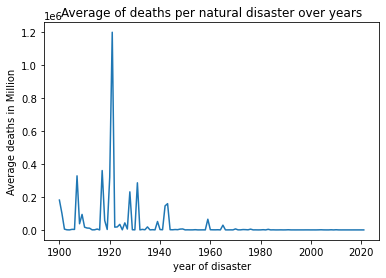

In [11]:
# calc mean deaths per disaster over the years

means = df_a.groupby(["Start_Year"]).mean()['Total_Deaths'].round()
ax = means.plot(kind = 'line')
ax.set_ylabel('Average deaths in Million')
ax.set_xlabel ('year of disaster')
ax.set_title('Average of deaths per natural disaster over years')

The graphic shows how many people died on average per natural disaster per year. As there is only one event with 1.2 million death in 1921 it leads to that big spike. Therefor we decided to use decades instead of years.

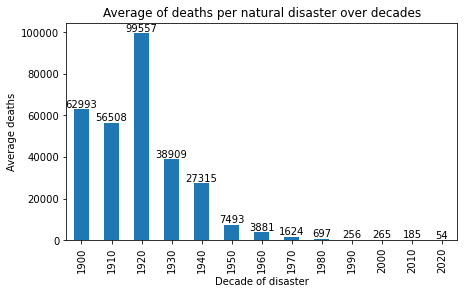

In [12]:
# calc mean deaths, per Decade and plot them in a bar plot
means = df_a.groupby(["Disaster_Decade"]).mean()['Total_Deaths'].round()
ax = means.plot(kind = 'bar', figsize = (7,4))
ax.set_ylabel('Average deaths')
ax.set_xlabel ('Decade of disaster')
ax.set_title('Average of deaths per natural disaster over decades')
ax.bar_label(ax.containers[0])
plt.show()

When having a look at the average deaths per decade per natural disaster, it can be seen that there was a peek in the 1920th and the number of deaths decreased over the years. However, this does not automatically mean that the number of natural disasters is decreasing. 

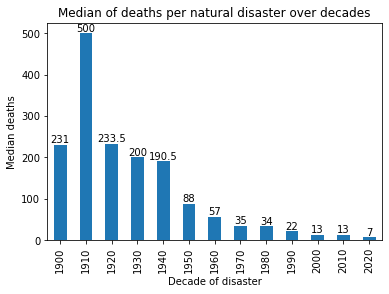

In [13]:
# calc median deaths, per Decade and plot them in a bar plot
medians = df_a.groupby(["Disaster_Decade"]).median()['Total_Deaths']
ax = medians.plot(kind = 'bar', figsize = (6,4))
ax.set_ylabel('Median deaths')
ax.set_xlabel ('Decade of disaster')
ax.set_title('Median of deaths per natural disaster over decades')
ax.bar_label(ax.containers[0])
plt.show()

The median compared to the mean shows that there seem to have been some events in 1920 leading to a really high number of deaths. Still we can see, that the number of deaths have significantly decreased in the last 90 years.

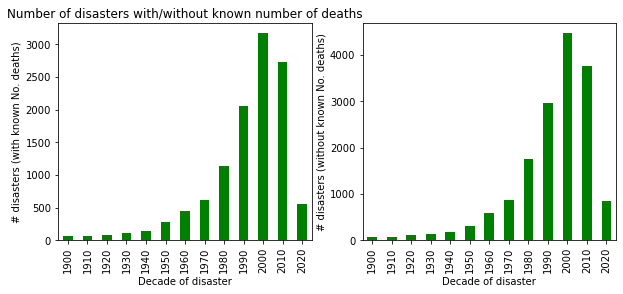

Disaster_Decade
1900      79
1910      77
1920     106
1930     135
1940     170
1950     310
1960     593
1970     871
1980    1755
1990    2957
2000    4473
2010    3758
2020     848
Name: Continent, dtype: int64
Last Start_year of data : 2021
Hochgerechnete Number of natural disasters 2020-2029: 4214.0


In [14]:
# calc count, per Decade and plot them in a bar plot
counts = df_a.groupby(["Disaster_Decade"]).count()['Total_Deaths']
plt.subplot(1, 2,1)
ax = counts.plot(kind = 'bar', figsize = (6,4), color ="green")
ax.set_ylabel('# disasters (with known No. deaths)')
ax.set_xlabel ('Decade of disaster')
ax.set_title('Number of disasters with/without known number of deaths')
#ax.bar_label(ax.containers[0])

counts = df_a.groupby(["Disaster_Decade"]).count()['Continent'] # continent just used, because then we to not have a look at na values
plt.subplot(1, 2, 2)
ax = counts.plot(kind = 'bar', figsize = (10,4), color ="green")
ax.set_ylabel('# disasters (without known No. deaths)')
ax.set_xlabel ('Decade of disaster')
#ax.bar_label(ax.containers[0])
plt.show()

print(counts)
print("Last Start_year of data : " +str(df_a["Start_Year"].max()))
print( "Hochgerechnete Number of natural disasters 2020-2029: " + str(1204*3.5))

In the last decade, the number of deaths/disasters is of course much smaller, since the data only contain information up to the year 2021. So -- assuming that the first 2 years of the 1920s are representative of the decade  - this value would have to be multiplied by 5 to get a correct ratio.
Additionally it can be seen, that (as the graphics above have shown) the number of deaths per natural disaster decreased in the last century, but the number of natural disasters has definitifly constantly increased. This could either mean, that there are more natural disasters with a lower impact or that e.g. due to better health care or faster help there are just less people dying and the intensity of the disasters did not change that much.

To look a bit more into that, we decided to have a look at the number of affected.

Disaster_Decade
1900    0.03
1910    0.29
1920    1.86
1930    0.38
1940    0.08
1950    0.24
1960    0.58
1970    0.96
1980    1.11
1990    0.95
2000    0.64
2010    0.59
2020    0.31
Name: Total_Affected, dtype: float64


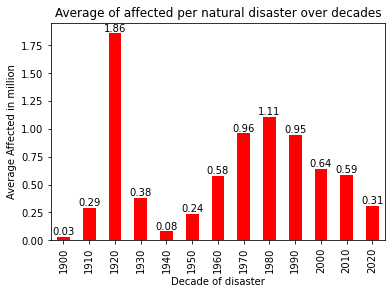

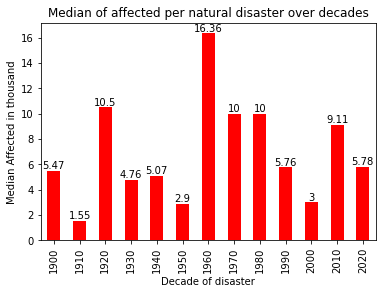

Disaster_Decade
1900     5.47
1910     1.55
1920    10.50
1930     4.76
1940     5.07
1950     2.90
1960    16.36
1970    10.00
1980    10.00
1990     5.76
2000     3.00
2010     9.11
2020     5.78
Name: Total_Affected, dtype: float64


In [15]:
# calc mean affected, per Decade and plot them in a bar plot
means_aff = round(df_a.groupby(["Disaster_Decade"]).mean()['Total_Affected'].round()/1_000_000,2)
#plt.subplot(1, 2,1)
ax = means_aff.plot(kind = 'bar', figsize = (6,4), color ="red")
ax.set_ylabel('Average Affected in million')
ax.set_xlabel ('Decade of disaster')
ax.set_title('Average of affected per natural disaster over decades')
print(means_aff)
ax.bar_label(ax.containers[0])
plt.show()

# calc median deaths, per Decade and plot them in a bar plot
medians_aff = round(df_a.groupby(["Disaster_Decade"]).median()['Total_Affected']/1_000,2)
#plt.subplot(1, 2,2)
plt.tight_layout()
ax = medians_aff.plot(kind = 'bar', figsize = (6,4), color ="red")
ax.set_ylabel('Median Affected in thousand')
ax.set_xlabel ('Decade of disaster')
ax.set_title('Median of affected per natural disaster over decades')
ax.bar_label(ax.containers[0])
plt.show()

print(medians_aff)

The number of affected shows a different picture than the one from the number of deaths. This supports our supposition, that less people die but that there are more and more people affected from natural disasters.

We take one quick look why the 1920 decade has so many deaths.

In [17]:
data_1920 = df_a.loc[df_a["Disaster_Decade"]==1920]
data_1920.nlargest(6,"Total_Deaths")
#df_a.nlargest(15,"Total_Deaths")

,Disaster_Group,Disaster_Subgroup,Disaster_Type,Disaster_Subtype,Disaster_Subsubtype,Country,ISO,Region,Continent,Associated_Dis,Associated_Dis2,Start_Year,End_Year,Total_Deaths,Total_Affected,Disaster_Decade
96,Natural,Climatological,Drought,Drought,<NA>,China,CHN,Eastern Asia,Asia,<NA>,<NA>,1928,1928,3000000.0,NaN,1920
58,Natural,Biological,Epidemic,Bacterial disease,<NA>,India,IND,Southern Asia,Asia,<NA>,<NA>,1920,1920,2000000.0,NaN,1920
906,Natural,Climatological,Drought,Drought,<NA>,Soviet Union,SUN,Russian Federation,Europe,Crop failure,Famine,1921,1921,1200000.0,5000000.0,1920
56,Natural,Climatological,Drought,Drought,<NA>,China,CHN,Eastern Asia,Asia,<NA>,<NA>,1920,1920,500000.0,20000000.0,1920
59,Natural,Biological,Epidemic,Bacterial disease,<NA>,India,IND,Southern Asia,Asia,<NA>,<NA>,1920,1920,500000.0,NaN,1920
85,Natural,Biological,Epidemic,Viral disease,<NA>,India,IND,Southern Asia,Asia,<NA>,<NA>,1926,1926,423000.0,NaN,1920


Up until now we have used "Start_Year" as the relevant year. Now let's look at how the results change if we distribute the deaths per event equally over all years (from "Start_Year" to "End_Year)

In [18]:
df_a_deaths = get_yearly_deaths(df_a, include_zero=True).to_frame().reset_index()
df_a_deaths = df_a_deaths[(df_a_deaths['Year'] != 2022)] # filter out data from 2022
# new column (decade)
df_a_deaths['Disaster_Decade'] = df_a_deaths['Year']//10*10 
df_a_deaths = df_a_deaths.astype({"Total_Deaths": np.float64, "Year": np.int32, "Disaster_Decade":np.int32})
df_a_deaths.sum()['Total_Deaths']/(df_a_deaths.max()['Year']-df_a_deaths.min()['Year']+1)# check, daran verändert sich nichts
#df_a_deaths

265986.2786885246

Text(0.5, 1.0, ' Deaths per year from natural disaster')

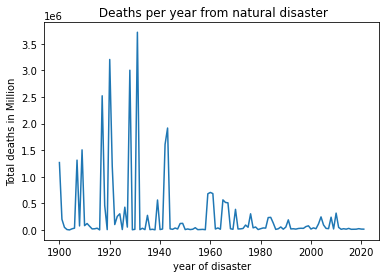

In [19]:
# calc mean deaths, per year and plot them in a bar plot

dth_distr = df_a_deaths.groupby(["Year"]).sum()['Total_Deaths'].round()
ax = dth_distr.plot(kind = 'line')
ax.set_ylabel('Total deaths in Million')
ax.set_xlabel ('year of disaster')
ax.set_title(' Deaths per year from natural disaster')

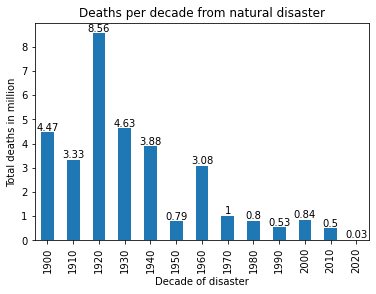

In [20]:
# calc deaths per Decade and plot them in a bar plot
sum_distr = round(df_a_deaths.groupby(["Disaster_Decade"]).sum()['Total_Deaths']/1_000_000,2)
ax = sum_distr.plot(kind = 'bar')
ax.set_ylabel('Total deaths in million')
ax.set_xlabel ('Decade of disaster')
ax.set_title('Deaths per decade from natural disaster')
ax.bar_label(ax.containers[0])
plt.show()

### Conclusions:
The average/median number of deaths per natural disaster over the last century has definitly decreased.
The number of deaths per decade has also decreased over the last 122 years. (Always keepining in mind, that the 2020 decade only contains 2 years, not ten as the others.
The number of natural disasters itself and also the average/median number of people affected per natural disasters however has increased.

Trend Analysis: Have a look, why the number of deaths in the 1920th is so high (5 from the 15 biggest disasters happend in the 1920th)

- Drought in China (1928): more political than natural (warlords using grain for themselves, less production due to opium plantation); Reference: https://disasterhistory.org/the-northwest-china-famine-1928-1930

- Epidemic in India (1920): Encephalitis lethargica; Reference https://simplifiedupsc.in/epidemics-that-have-hit-india-since-1900/

- Drought in Soviet Union (1921): natural and human caused - (Civil War, Russian Revolution: confiscation of stored grain) ; Reference: https://www.norkarussia.info/famine-1921-1924.html

- Viral disease (1926): Spanish flu brought back from soldiers; Reference: https://simplifiedupsc.in/epidemics-that-have-hit-india-since-1900/

- Drought in China (1920): rainless 12 months - total failure of Harvest; Reference: http://disasterhistory.org/north-china-famine-1920-21

Natural disasters in the early 1920s are partly also consequences of the first world war.

## 2. How does this vary by country? How does this vary by type of natural disaster?  